# 泛化误差、欠拟合与过拟合

## 经验误差、泛化误差

我们把学习器的实际预测输出与样本的真实输出之间的差异称为“误差”（error），学习器在训练集上的误差称为“训练误差”（training error）或“经验误差”（empirical error），在新样本上的误差称为“泛化误差”（generalization error）。


## 欠拟合、过拟合

### 定义

显然，我们希望得到泛化误差小的学习器。然而，我们事先并不知道新样本是什么样，实际能做的是努力使经验误差最小化。

但是，当学习器把训练样本学得“太好”了的时候，很可能已经把训练样本自身的一些特点当作了所有潜在样本都会具有的一般性质，这样就会导致泛化性能下降。这种现象在机器学习中称为“过拟合”（overfitting）。与“过拟合”相对的是“欠拟合”（underfitting），这是指对训练样本的一般性质尚未学好。

### 示例

例如，有一份房子面积与房价的数据 $\left\{ (1, 1), (2, 2.18), (3.01, 3.05), (4, 3.3), (5, 3.45), (6, 3.65) \right\}$，我们有三个学习器模型，分别是一次、二次、五次多项式 $y=\theta_0 + \theta_1 x$、$y=\theta_0 + \theta_1 x + \theta_2 x^2$、$y=\theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$，它们的拟合效果如下图。

很明显，在这个问题中，一次多项式是欠拟合的；而五次多项式是过拟合的。

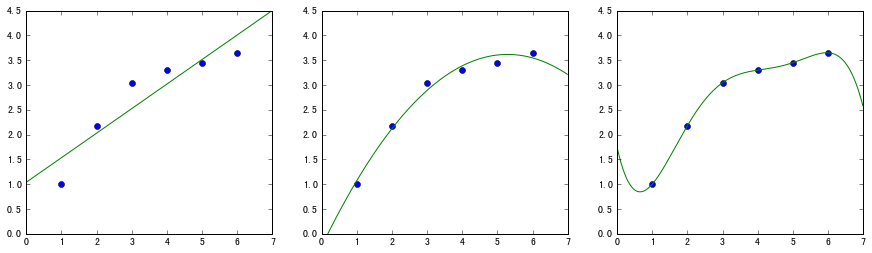

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 样本
x_train = [1, 2, 3.01, 4, 5, 6]
y_train = [1, 2.18, 3.05, 3.3, 3.45, 3.65]

x = np.arange(0, 7, 0.01)
p1 = np.poly1d(np.polyfit(x_train, y_train, 1)) # 一次多项式
p2 = np.poly1d(np.polyfit(x_train, y_train, 2)) # 二次
p5 = np.poly1d(np.polyfit(x_train, y_train, 5)) # 五次

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax0.plot(x_train, y_train, 'o', x, p1(x), '-')
ax0.set_ylim([0, 4.5])

ax1.plot(x_train, y_train, 'o', x, p2(x), '-')
ax1.set_ylim([0, 4.5])

ax2.plot(x_train, y_train, 'o', x, p5(x), '-')
ax2.set_ylim([0, 4.5])


plt.show()

### 产生原因及解决办法

过拟合：

- 有多重因素导致过拟合，其中最常见的情况是由于学习能力过于强大，以至于把训练样本所包含的不太一般的特性都学到了。
- 无法彻底避免，我们所能做的只是“缓解“，或者说减小其风险。
- 实践中常用正则化减小过拟合的影响

欠拟合：

- 通常是由于学习能力低下而造成的。
- 比较容易克服，例如在决策树学习中扩展分支、在神经网络学习中增加训练轮数等。